<a href="https://colab.research.google.com/github/adit0505/Fetch_SeniorDataAnalyst/blob/main/Fetch_Assessment_Product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration of Product Data

Checking the fields of the Product data and seeing if there are any data quality issues

In [15]:
# Importing the Transactions Table for initial analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_product = pd.read_csv('/content/drive/MyDrive/PRODUCTS_TAKEHOME.csv')

## Initial Data Analysis

In [16]:
# Checking the first few rows of the dataset
df_product.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


Based on an initial check of the data, the following issues are seen for some rows:


1. Brand and Manufacturer is blank
2. Category 4 is blank

This might impact any analysis related to brands and manufacturers.
Need to check how many products are missing brand and manufacturer along with any other fields that might be missing.


In [17]:
# Check data types of each column
print("\n Data Type")
print(df_product.dtypes)

num_rows = len(df_product)

# Check for missing values in each column
print("\n % of Products with Missing or Null values in each column")
print((df_product.isnull().sum()/num_rows)*100)

# Check for unique values in each column
print("\n Unique values in each column")
for col in df_product.columns:
  print(col, df_product[col].nunique())


 Data Type
CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
CATEGORY_4       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object

 % of Products with Missing or Null values in each column
CATEGORY_1       0.013128
CATEGORY_2       0.168411
CATEGORY_3       7.162895
CATEGORY_4      92.021898
MANUFACTURER    26.784160
BRAND           26.783923
BARCODE          0.476020
dtype: float64

 Unique values in each column
CATEGORY_1 27
CATEGORY_2 121
CATEGORY_3 344
CATEGORY_4 127
MANUFACTURER 4354
BRAND 8122
BARCODE 841342


Based on the above analysis:


1.   ~26% of products are missing a brand
2. Similarly, 26% of products are missing a manufacturer
2.   Category 4 is missing for ~92%

This will create an issue as we need to do brand and manufacturer level data. So for any brand level analysis, these products will not be considered.

### Some other data checks

Top 10 Categories (by Product count in Category 1)

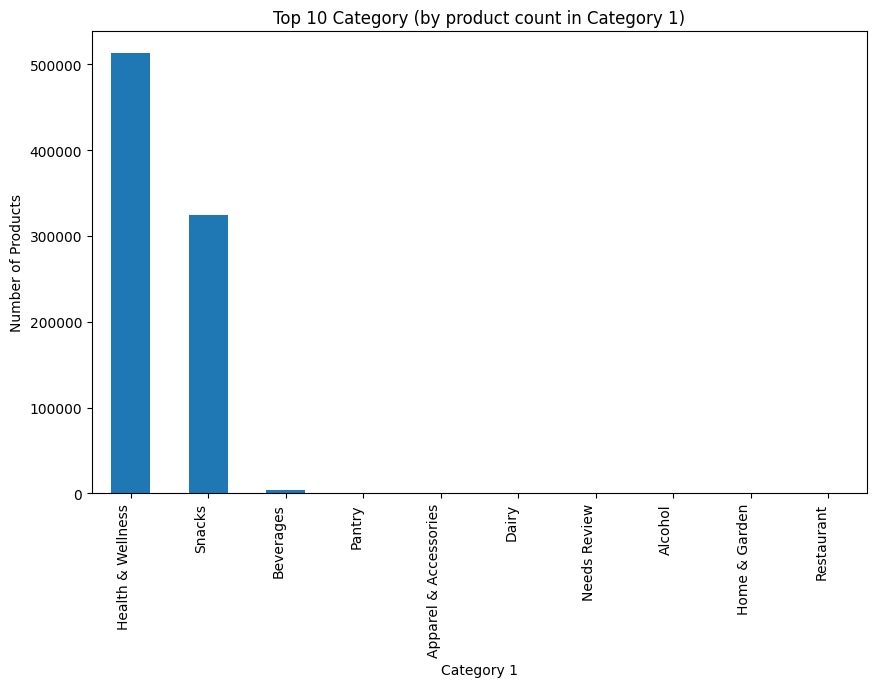

In [18]:
category_counts = df_product['CATEGORY_1'].value_counts().head(10)

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Top 10 Category (by product count in Category 1)')
plt.xlabel('Category 1')
plt.ylabel('Number of Products')
plt.xticks(rotation=90, ha='right')
plt.show()

Top 10 Brands (by Product count)

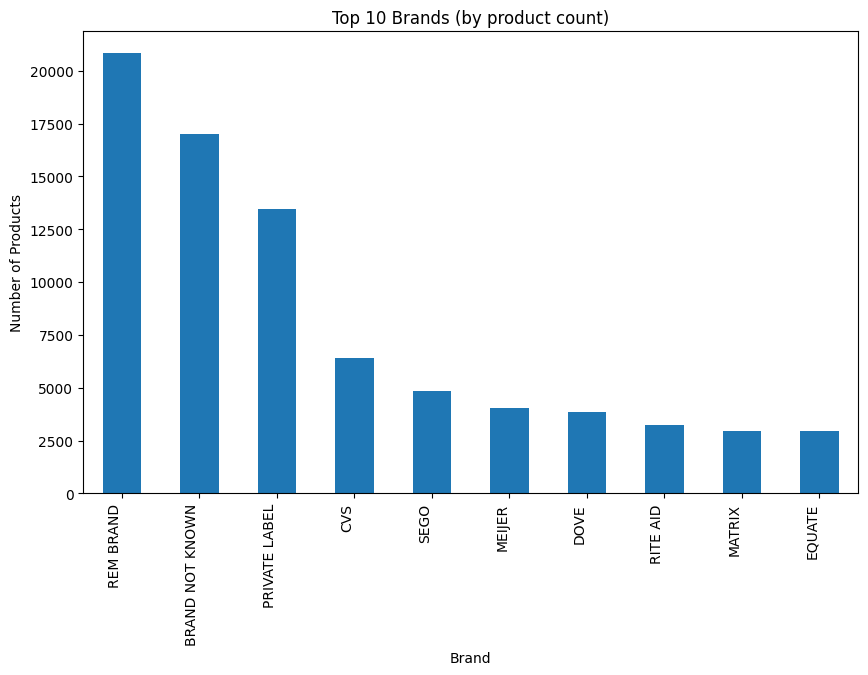

In [19]:
brand_counts = df_product['BRAND'].value_counts().head(10)

plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar')
plt.title('Top 10 Brands (by product count)')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=90, ha='right')
plt.show()